<a href="https://www.kaggle.com/code/xyzaraa/stock-data-analysis-and-model-prediction?scriptVersionId=251180389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing Stocks Data 2025

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/stock-market-june-2025-dataset/stock_market_june2025.csv')

In [3]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,01-06-2025,SLH,34.92,34.53,35.22,34.38,2966611,5.738136e+10,29.63,2.85,1.17,39.39,28.44,Industrials
1,01-06-2025,WGB,206.50,208.45,210.51,205.12,1658738,5.274707e+10,13.03,2.73,16.00,227.38,136.79,Energy
2,01-06-2025,ZIN,125.10,124.03,127.40,121.77,10709898,5.596949e+10,29.19,2.64,4.25,138.35,100.69,Healthcare
3,01-06-2025,YPY,260.55,265.28,269.99,256.64,14012358,7.964089e+10,19.92,1.29,13.32,317.57,178.26,Industrials
4,01-06-2025,VKD,182.43,186.89,189.40,179.02,14758143,7.271437e+10,40.18,1.17,4.65,243.54,165.53,Technology


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


In [5]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,157.500443,157.567054,160.423258,154.703956,8.075851e+06,6.520977e+10,23.143859,2.337327,7.663621,189.009381,125.964574
std,82.043046,82.227448,83.626559,80.647073,5.104890e+06,1.467168e+11,7.498239,1.124037,5.202411,99.082291,67.767279
min,15.020000,14.770000,15.120000,14.480000,5.007270e+05,1.290761e+09,8.020000,0.010000,0.470000,17.030000,10.010000
25%,86.592500,87.055000,88.487500,85.380000,4.268123e+06,2.717406e+10,16.997500,1.450000,3.745000,104.687500,66.662500
50%,155.675000,155.675000,158.820000,152.725000,7.911528e+06,5.135322e+10,22.620000,2.330000,6.790000,185.425000,123.040000
75%,227.207500,227.902500,231.627500,223.102500,1.160026e+07,7.623076e+10,28.977500,3.127500,10.350000,271.920000,179.825000
max,434.400000,447.430000,453.860000,431.500000,6.537774e+07,3.481112e+12,44.890000,5.000000,54.100000,571.570000,345.530000


In [6]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1762 non-null   datetime64[ns]
 1   Ticker          1762 non-null   object        
 2   Open Price      1762 non-null   float64       
 3   Close Price     1762 non-null   float64       
 4   High Price      1762 non-null   float64       
 5   Low Price       1762 non-null   float64       
 6   Volume Traded   1762 non-null   int64         
 7   Market Cap      1762 non-null   float64       
 8   PE Ratio        1762 non-null   float64       
 9   Dividend Yield  1762 non-null   float64       
 10  EPS             1762 non-null   float64       
 11  52 Week High    1762 non-null   float64       
 12  52 Week Low     1762 non-null   float64       
 13  Sector          1762 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
m

In [7]:
df.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64

## Determine The Relation of Stock Price to Volume

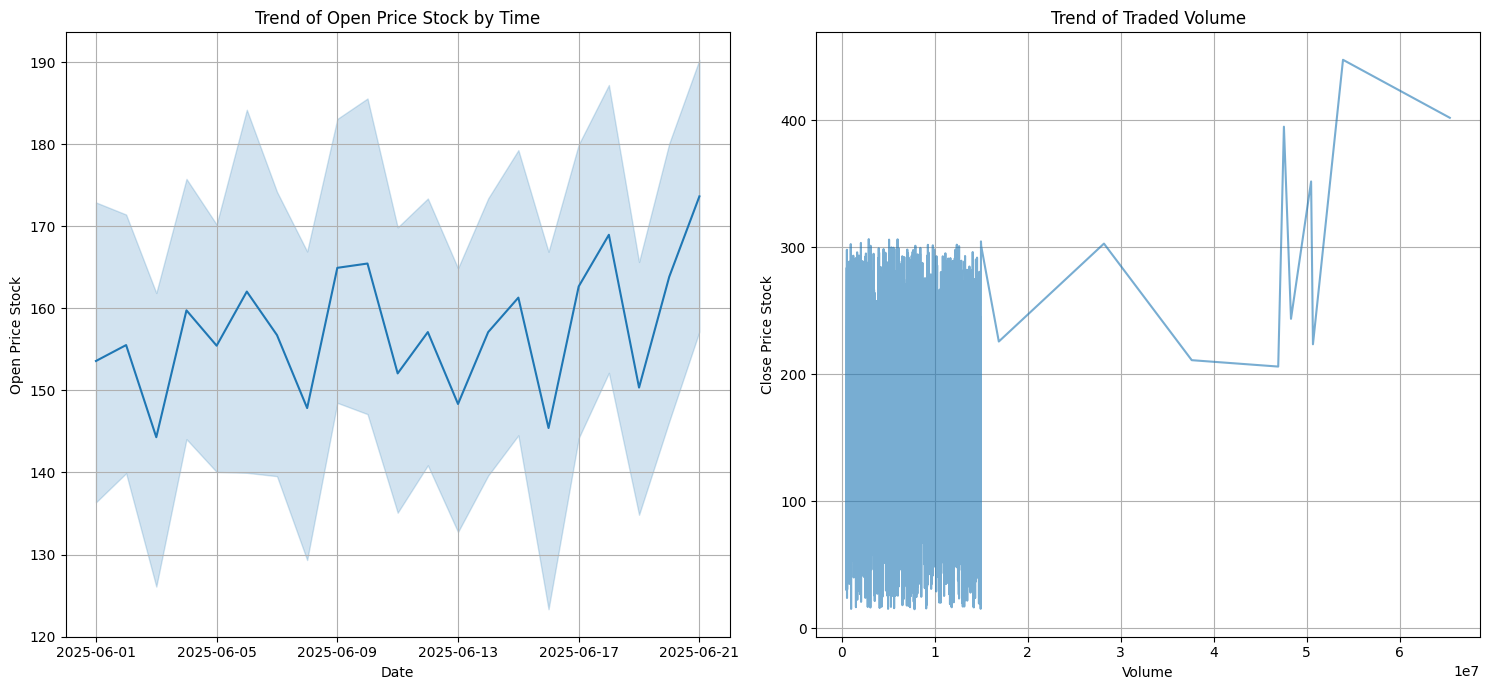

In [8]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.lineplot(x='Date', y='Open Price', data=df)
plt.title("Trend of Open Price Stock by Time")
plt.xlabel("Date")
plt.ylabel("Open Price Stock")
plt.grid(True)

plt.subplot(1,2,2)
sns.lineplot(x='Volume Traded', y='Close Price', data=df, alpha=0.6)
plt.title("Trend of Traded Volume")
plt.xlabel("Volume")
plt.ylabel("Close Price Stock")
plt.grid(True)

plt.tight_layout()
plt.show()

We can observe how the means of opening prices for each stock in our data are displayed on the left side of the graph in the visualization above.  The midline represents the overall pattern of market volatility, rising and falling during June 2025.  The blur region surrounding the line is of relevance because it indicates non-uniform market dynamics. The bigger the blur area, the more price variation there is, with some opening highly dear and some very cheap.  On the other hand, stock prices that are very close to one another are indicated by narrow areas.

The majority of the transaction values occurred on the relatively modest volume, as can be seen in the second plot.  The several lines on the left truly convey these facts.  However, there are occasionally extremely large trading volumes, which are indicated by the right-hand line.  It's crucial to remember that price increases don't always correspond well with these volume rises.  This implies that, depending on market emotion or the news that surrounds it, stock values can either rise or fall sharply in a highly crowded market.  This demonstrates that although high volume is a sign of active markets, other factors determine the direction of price movement.

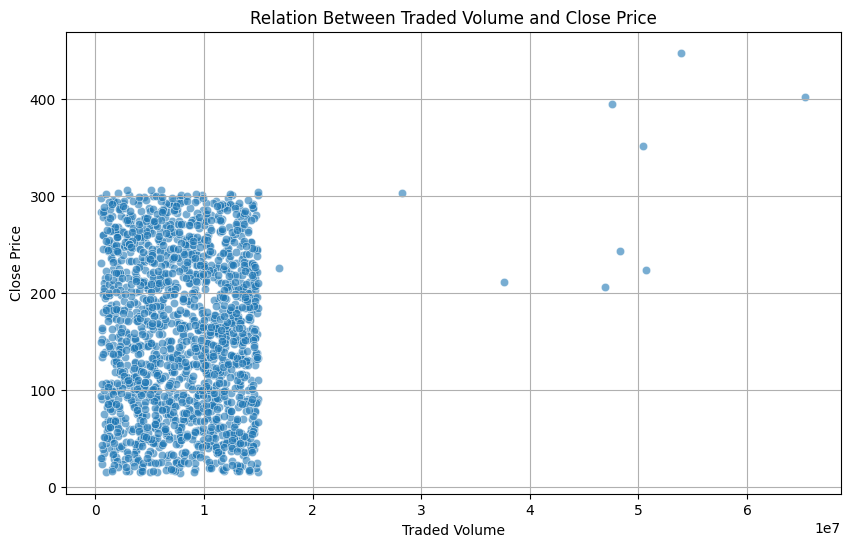


The Correlation Coefficient between Closing Price and Volume: 0.06
The correlation between closing price and volume is relatively weak.
This means there is no clear linear relationship between the two.


In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume Traded', y='Close Price', data=df, alpha=0.6)
plt.title(f'Relation Between Traded Volume and Close Price')
plt.xlabel('Traded Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


correlation = df['Close Price'].corr(df['Volume Traded'])
print(f"\nThe Correlation Coefficient between Closing Price and Volume: {correlation:.2f}")

if correlation > 0.5:
 print("There is a strong positive correlation between closing price and volume.")
 print("This means when trading volume is high, closing price tends to be high as well.")
elif correlation < -0.5:
 print("There is a strong negative correlation between closing price and volume. ")
 print("This means when trading volume is high, the closing price tends to be low.")
elif -0.5 <= correlation <= 0.5:
 print("The correlation between closing price and volume is relatively weak.")
 print("This means there is no clear linear relationship between the two.")

From the visualization above, as we can see that volume trade is relative low which means, almost all the trades are small trades. This is a good sign for the market as it is less likely to be manipulated. Also, the volume distribution is relatively even which means that the market is not dominated by any particular group. With the 0,6 coefficient correlation (it's near with 0), it's show that the price and volume are not correlated which is a good sign for the market as it is less likely. The dots on the left side is on a normal day, which means most of the trades were happened with a nothing "special things", whereas on the right side is trades on a special day (or we can call it as an outlier).

let's get to the next analysis, we'll see how the outlier is

In [10]:
volume_threshold = 2e7 #20.000.000

high_vol_days = df[df['Volume Traded'] > volume_threshold]
print("\nDays with Very High Trading Volume:")
print(high_vol_days[['Date', 'Ticker', 'Close Price', 'Volume Traded']].sort_values(by='Date'))


Days with Very High Trading Volume:
           Date Ticker  Close Price  Volume Traded
488  2025-06-06  GOOGL       401.77       65377735
654  2025-06-09   MSFT       243.47       48301421
677  2025-06-09   AMZN       351.64       50463820
865  2025-06-11   AAPL       223.41       50662192
1303 2025-06-16  BRK.B       447.43       53892654
1379 2025-06-17   NVDA       302.70       28192563
1523 2025-06-19   TSLA       210.90       37631821
1590 2025-06-20   META       394.76       47539626
1736 2025-06-21    UNH       205.87       46928599


As we can see that in the middle of June 2025 is the most active time in the trade market, whereas some of stocks were having a extreme spikes in transaction volume (up to 20 mio units). The interesting things is, this highest volume isn't always with the price increase; we can see from the close price variety, from the highest to the lowest, shows that the acitivity of the intense trades can be trigerred by the positive or negative sentiments. Further more, the stock emergence with a different high volume on the same date (example on the 9th June 2025), indicates that the triger things may be extensive, that affects to all of the sectors or even all of the markets, not only one of the company, that makes the volume as the strong indicator of the market sentiment.

## Understanding Financial Characteristics and Stock Size in the Dataset

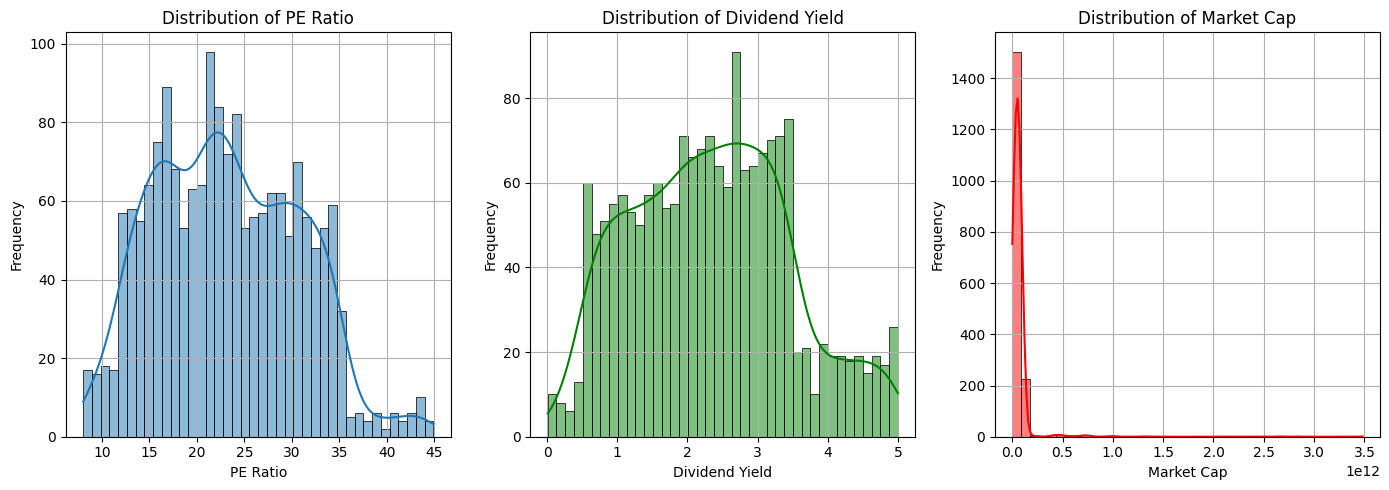

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(df['PE Ratio'].dropna(), bins=40, kde=True)
plt.title("Distribution of PE Ratio")
plt.xlabel("PE Ratio")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1,3,2)
sns.histplot(df['Dividend Yield'].dropna(), bins=40, kde=True, color='g')
plt.title("Distribution of Dividend Yield")
plt.xlabel("Dividend Yield")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1,3,3)
sns.histplot(df['Market Cap'].dropna(), bins=40, kde=True, color='r')
plt.title("Distribution of Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

As we can see (from left side), PE Ratio (Price to Earning Ratio) is between 15-35, there's a peak in the graph in the range of 15-25 with the highest peak in the range of 20-25. While the lowest was on the range 40-45. Means that the stock data was tend to have a valuation in the range that called normal range for a "healthy" companies. While the highest range 40-45, it was a sign that the stock was overvalued or may be some investor was expecting a high growth in the future. 

Next, on the second graph, distribution of dividend yield (how much of the profit from the shares can be shared between the company and the investor), shows that there are two groups, one at 2-3% and the other at 4-5%. Even there is one peak that only 0%, it was a sign that the company was not paying dividend at all. While the highest peak was at 2-3%, it was a sign that the company was paying a standard dividend to the investor, and the last peak was on 4-5%, which means that the company was paying a high dividend to the investor.

And the last graph was show that a lot of line was on the left side, which means the majority of the stocks was owned by companies that are still small or just starting out. This pattern is very common in the stock market, where the number of smaller companies far outweighs the handful of giants. However, the presence of small bars appearing further to the right of the graph confirms that the dataset also includes some ‘giant’ companies with very large market capitalizations. 

Performing correlation analysis with 1762 rows of data after dropping missing values.


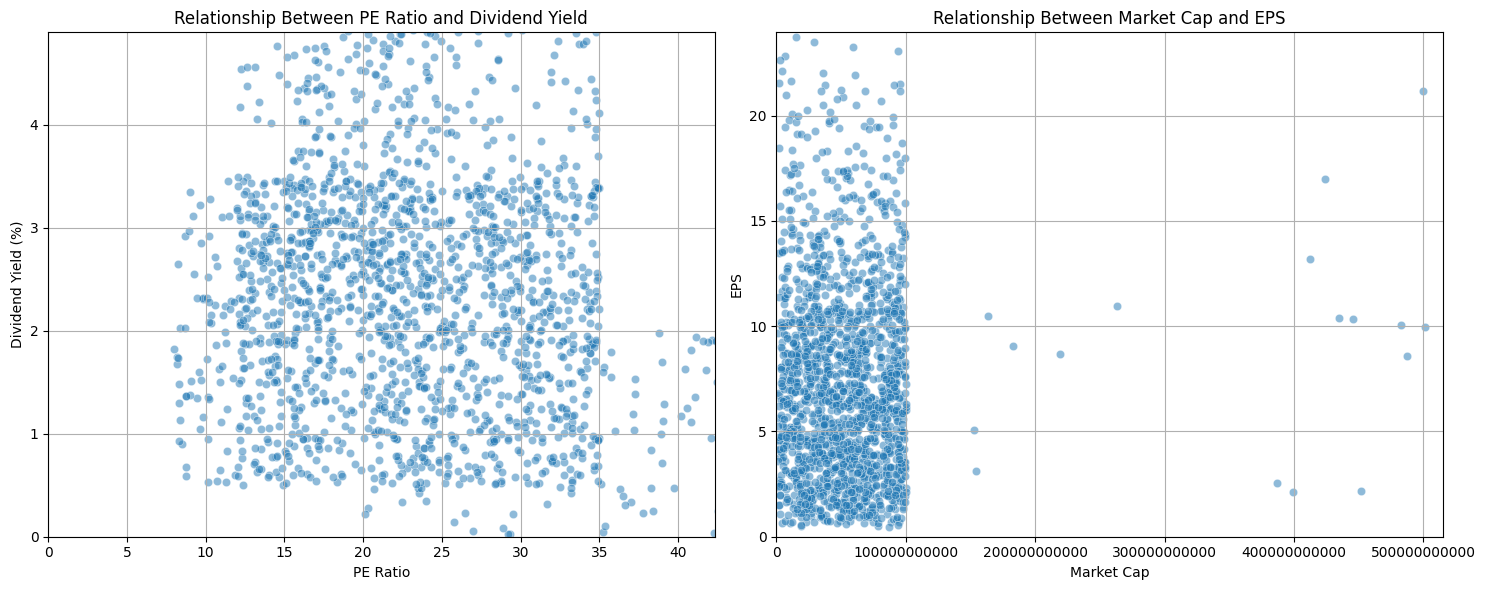


Pearson Correlation Coefficients:
PE Ratio vs Dividend Yield: -0.12
Market Cap vs EPS: 0.06
Close Price vs Volume Traded: 0.06
Close Price vs Market Cap: 0.09
PE Ratio vs EPS: -0.51

Interpretation of Correlation Coefficients:
- Values close to 1: Strong positive relationship (as one increases, the other tends to increase).
- Values close to -1: Strong negative relationship (as one increases, the other tends to decrease).
- Values close to 0: Weak or no clear linear relationship.


In [12]:
columns_for_correlation = ['PE Ratio', 'Dividend Yield', 'Market Cap', 'EPS', 'Close Price', 'Volume Traded']
df_filtered_corr = df.dropna(subset=columns_for_correlation).copy()

if df_filtered_corr.empty:
    print("Warning: Not enough data after dropping missing values for correlation analysis.")
else:
    print(f"Performing correlation analysis with {df_filtered_corr.shape[0]} rows of data after dropping missing values.")
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1) 
    pe_ratio_upper_bound = df_filtered_corr['PE Ratio'].quantile(0.99)
    div_yield_upper_bound = df_filtered_corr['Dividend Yield'].quantile(0.99)

    sns.scatterplot(x='PE Ratio', y='Dividend Yield', data=df_filtered_corr[df_filtered_corr['PE Ratio'] > 0], alpha=0.5)
    plt.title('Relationship Between PE Ratio and Dividend Yield')
    plt.xlabel('PE Ratio')
    plt.ylabel('Dividend Yield (%)')
    plt.xlim(0, pe_ratio_upper_bound) 
    plt.ylim(0, div_yield_upper_bound) 
    plt.grid(True)

    plt.subplot(1, 2, 2)
    market_cap_upper_bound = df_filtered_corr['Market Cap'].quantile(0.99)
    eps_upper_bound = df_filtered_corr['EPS'].quantile(0.99) 
    sns.scatterplot(x='Market Cap', y='EPS', data=df_filtered_corr, alpha=0.5)
    plt.title('Relationship Between Market Cap and EPS')
    plt.xlabel('Market Cap')
    plt.ylabel('EPS')
    plt.xlim(0, market_cap_upper_bound) 
    plt.ylim(0, eps_upper_bound) 
    plt.ticklabel_format(style='plain', axis='x') 
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nPearson Correlation Coefficients:")
    corr_pe_div = df_filtered_corr['PE Ratio'].corr(df_filtered_corr['Dividend Yield'])
    print(f"PE Ratio vs Dividend Yield: {corr_pe_div:.2f}")
    corr_market_eps = df_filtered_corr['Market Cap'].corr(df_filtered_corr['EPS'])
    print(f"Market Cap vs EPS: {corr_market_eps:.2f}")
    corr_close_volume = df_filtered_corr['Close Price'].corr(df_filtered_corr['Volume Traded'])
    print(f"Close Price vs Volume Traded: {corr_close_volume:.2f}")
    corr_close_market = df_filtered_corr['Close Price'].corr(df_filtered_corr['Market Cap'])
    print(f"Close Price vs Market Cap: {corr_close_market:.2f}")
    corr_pe_eps = df_filtered_corr['PE Ratio'].corr(df_filtered_corr['EPS'])
    print(f"PE Ratio vs EPS: {corr_pe_eps:.2f}")

    print("\nInterpretation of Correlation Coefficients:")
    print("- Values close to 1: Strong positive relationship (as one increases, the other tends to increase).")
    print("- Values close to -1: Strong negative relationship (as one increases, the other tends to decrease).")
    print("- Values close to 0: Weak or no clear linear relationship.")

Relationship Between PE Ratio and Dividend Yield graph shows the PE Ratio (how "expensive" a stock's valuation is compared to its earnings) on the horizontal (X) axis, and Dividend Yield (what percentage of profit is distributed to investors) on the vertical (Y) axis. The most striking feature is that the blue dots are scattered very randomly across the entire graph. There's no clear upward or downward trend. We do observe a concentration of data points in the middle, roughly where the PE Ratio is between 15-35 and Dividend Yield is between 1-4%. This indicates a weak or no linear relationship between PE Ratio and Dividend Yield in your stock dataset. Simply put, a stock's valuation (whether it's considered "expensive" or "cheap" based on its PE Ratio) doesn't automatically determine how much dividend it will pay out. Growth companies (often with high PE Ratios) might choose not to pay dividends, while more established companies with moderate PE Ratios might offer consistent dividend yields. Investors often seek different things from different types of stocks (e.g., capital appreciation vs. dividend income), which contributes to this lack of a strong linear correlation.

While on the Market Cap graph, we can see that the graph heavily skewed to the left. There's a very dense cluster of dots near the Y-axis (low Market Cap). This means the majority of stocks in your data are from smaller companies (low Market Cap), and their EPS varies, but generally isn't extremely high. As we move further to the right (higher Market Cap), there are fewer, more scattered dots. These represent larger companies. Interestingly, some of these larger companies have significantly higher EPS compared to the bulk of smaller companies. This pattern suggests a positive relationship, though not perfectly linear, between Market Cap and EPS. Generally, larger companies (higher Market Cap) tend to have higher Earnings Per Share (EPS). This makes sense as larger companies often benefit from economies of scale, wider market reach, and more robust resources to generate substantial profits. However, there's still variation; not all large companies have sky-high EPS, and some smaller companies might still achieve respectable EPS. This plot also reinforces our earlier finding that your dataset is predominantly composed of small to medium-sized companies.

## Modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df_model = df.copy()

if 'Ticker' in df_model.columns:
    df_model = pd.get_dummies(df_model, columns=['Ticker'], drop_first=True)

feature_columns = ['Open Price', 'High Price', 'Low Price', 'Volume', 'Market Cap', 'PE Ratio', 'Dividend Yield', 'EPS', '52 Week High', '52 Week Low']
ticker_dummy_columns = [col for col in df_model.columns if col.startswith('Ticker_')]
all_features = feature_columns + ticker_dummy_columns

missing_features = [col for col in all_features if col not in df_model.columns]
if missing_features:
    all_features = [col for col in all_features if col not in missing_features]

X = df_model[all_features]
y = df_model['Close Price']

X = X.fillna(X.mean(numeric_only=True))

if X.empty or y.empty or X.shape[0] != y.shape[0]:
    raise ValueError("DataFrame fitur (X) atau target (y) kosong atau tidak cocok jumlah barisnya setelah pemrosesan data.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape data train_X: {X_train.shape}, y: {y_train.shape}")
print(f"Shape data test_X: {X_test.shape}, y: {y_test.shape}")

Shape data train_X: (1409, 1699), y: (1409,)
Shape data test_X: (353, 1699), y: (353,)


## Evaluation Model

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest ---")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


--- Random Forest ---
Mean Squared Error (MSE): 6.15
Root Mean Squared Error (RMSE): 2.48
R-squared (R2): 1.00


In [16]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- Model XGBoost ---")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")


--- Model XGBoost ---
Mean Squared Error (MSE): 41.90
Root Mean Squared Error (RMSE): 6.47
R-squared (R2): 0.99


## Comparing XGBoost and Random Forest

/tmp/ipykernel_13/520871971.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


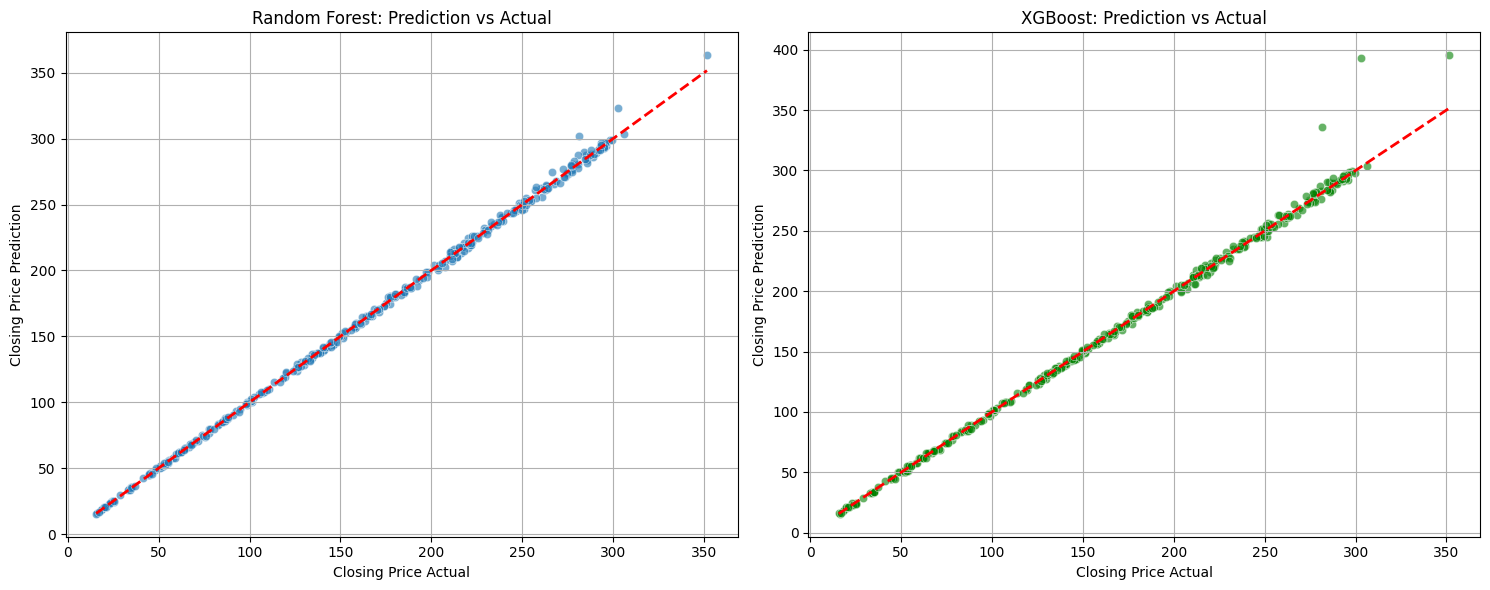

In [17]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis sempurna
plt.title('Random Forest: Prediction vs Actual')
plt.xlabel('Closing Price Actual')
plt.ylabel('Closing Price Prediction')
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis sempurna
plt.title('XGBoost: Prediction vs Actual')
plt.xlabel('Closing Price Actual')
plt.ylabel('Closing Price Prediction')
plt.grid(True)
plt.tight_layout()

plt.show()

Based on the model evaluation results, both models, Random Forest and XGBoost, showed excellent performance in predicting stock closing prices. The Random Forest model recorded a Mean Squared Error (MSE) of 6.15, Root Mean Squared Error (RMSE) of 2.48, and R-squared (R2) of 1.00. These near-perfect R2 values indicate that the Random Forest model is able to explain almost 100% of the variation in the actual stock closing prices, demonstrating exceptional accuracy and fit. On the other hand, the XGBoost model performed slightly below Random Forest, with an MSE of 41.90, RMSE of 6.47, and R-squared (R2) of 0.99. While an R2 of 0.99 is still a very strong performance, the higher MSE and RMSE values compared to Random Forest indicate that the XGBoost predictions have a slightly larger average error. Overall, Random Forest appears to be the superior choice in this scenario based on the evaluation metrics provided, although both models remain highly effective in the stock price prediction task.